# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [3]:
# TODO: view the shape of your data
transactions.shape

(1000000, 10)

In [4]:
# Counts the number of unique values of the Type column
transactions.type.value_counts()

type
CASH_OUT    351360
PAYMENT     338573
CASH_IN     219955
TRANSFER     83695
DEBIT         6417
Name: count, dtype: int64

In [5]:
# Counts the values in the isFlaggedfraud column (orginal dataset)
transactions.isFlaggedFraud.value_counts()

isFlaggedFraud
0    999999
1         1
Name: count, dtype: int64

In [6]:
# Counts the values in the isFraud column (orginal dataset)
transactions.isFraud.value_counts()

isFraud
0    998703
1      1297
Name: count, dtype: int64

In [ ]:
# Counts the number of unique values in the Type column
transactions['type'].unique()

array(['PAYMENT', 'CASH_IN', 'TRANSFER', 'CASH_OUT', 'DEBIT'],
      dtype=object)

In [8]:
# TODO: sample a sample of the dataset (takes 10000 rows of the dataset, randomly and random_state=42)

transactions_sampled = transactions.sample(n= 10000, random_state=42)

In [9]:
# TODO: shows the updated shape of the sampled data
transactions_sampled.shape

(10000, 10)

In [10]:
# Shows the infomation of the sampled data
transactions_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 987231 to 551383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            10000 non-null  object 
 1   amount          10000 non-null  float64
 2   nameOrig        10000 non-null  object 
 3   oldbalanceOrg   10000 non-null  float64
 4   newbalanceOrig  10000 non-null  float64
 5   nameDest        10000 non-null  object 
 6   oldbalanceDest  10000 non-null  float64
 7   newbalanceDest  10000 non-null  float64
 8   isFraud         10000 non-null  int64  
 9   isFlaggedFraud  10000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 859.4+ KB


In [11]:
# Shows any missing values or data in our sampled data
transactions_sampled.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
# Shows the unique values in the type column of the sampled data
transactions_sampled['type'].unique()

array(['CASH_IN', 'CASH_OUT', 'PAYMENT', 'TRANSFER', 'DEBIT'],
      dtype=object)

In [13]:
# Shows the value counts of the type column in the sampled data
transactions_sampled.type.value_counts()

type
CASH_OUT    3522
PAYMENT     3373
CASH_IN     2193
TRANSFER     849
DEBIT         63
Name: count, dtype: int64

- For my EDA Analysis, I utilzed both sample and our originial dataset to provide a more robust descriptive analysis and faster visualizaitons. 
**Note: The sample did not include the debit transaction type.**

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

Based on our data and visualization, we can see that the numeric features (**amount**, **oldbalanceOrg**, and **oldbalanceDest**) show that for each bank feature, the amounts are on the lower end, even when compared to the original data set and the sampled dataset. The histogram shows that the amount, old balance org, and old balance dest are skewed to the left.

There are very few transactions with large amounts of money in the bank transactions. This data suggests that more users of the bank are doing lower transactions versus higher transactions. There are very few rare values distributions based on the data provided. 


Additionally, we can also look at the payment types of the dataset (**Cash_In**,**Cash_Out**,**Payment**, **Transfer** and **Debit**) that most of the transactions are from the **Cash_out** and **Payment**. There is very little **Debit** transaction types in the dataset. 

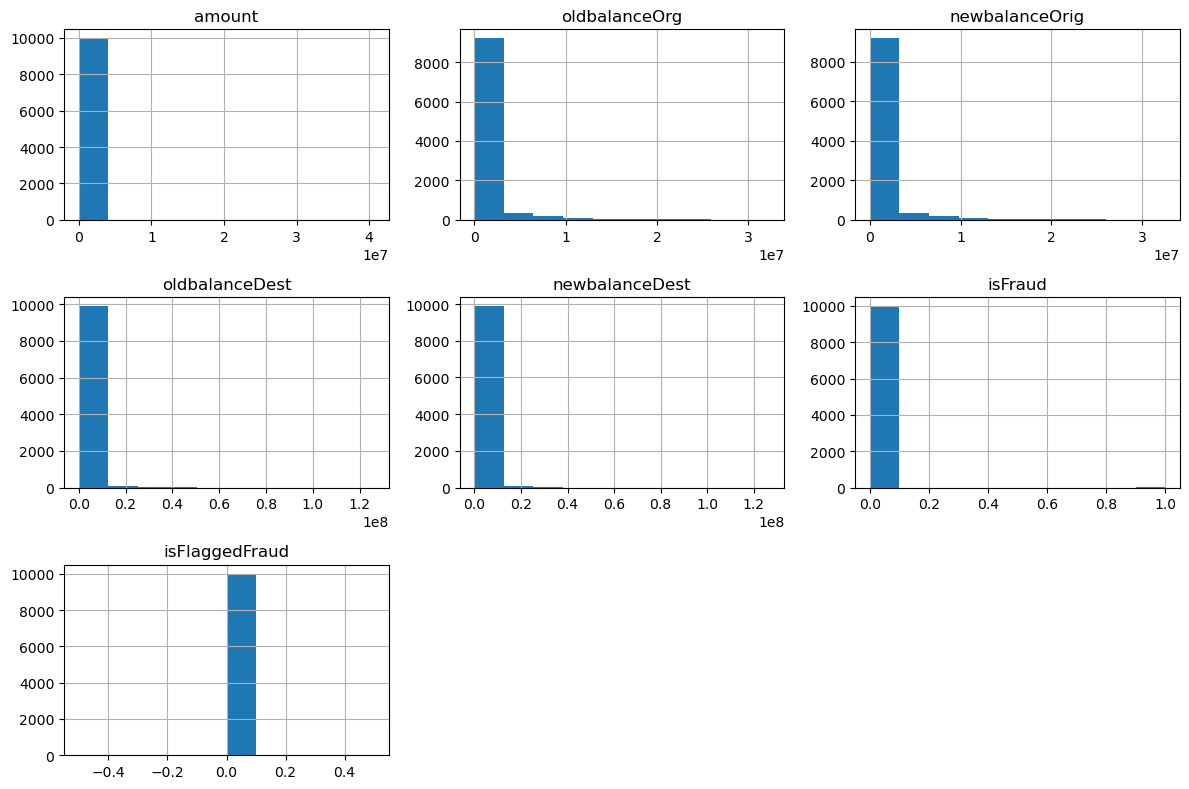

In [14]:
# Histogram to show frequncy across value ranges (Numerical Data)
num_cols = transactions_sampled.select_dtypes(include=['int64','float64']).columns
transactions_sampled[num_cols].hist(figsize=(12,8), bins=10)
plt.tight_layout()
plt.show()


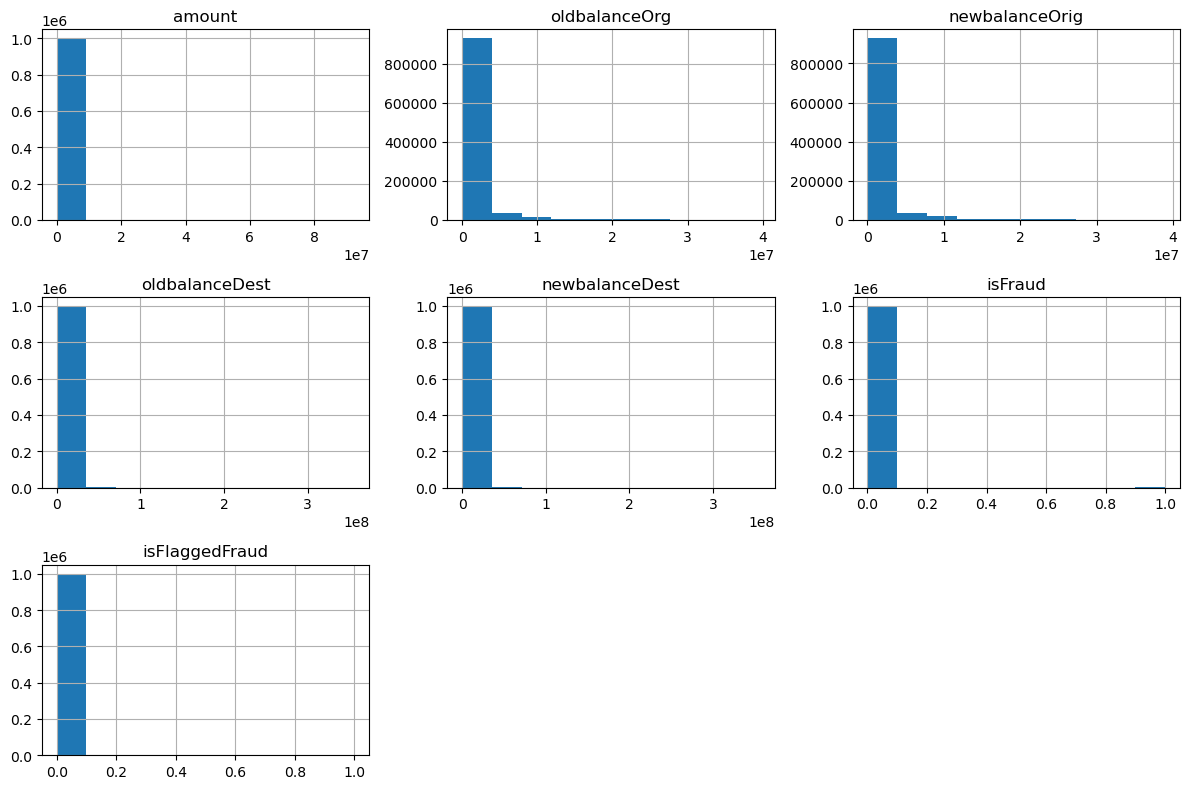

In [15]:
# Histogram to show frequncy across value ranges (Numerical Data) for the original dataset
num_cols = transactions.select_dtypes(include=['int64','float64']).columns
transactions[num_cols].hist(figsize=(12,8), bins=10)
plt.tight_layout()
plt.show()

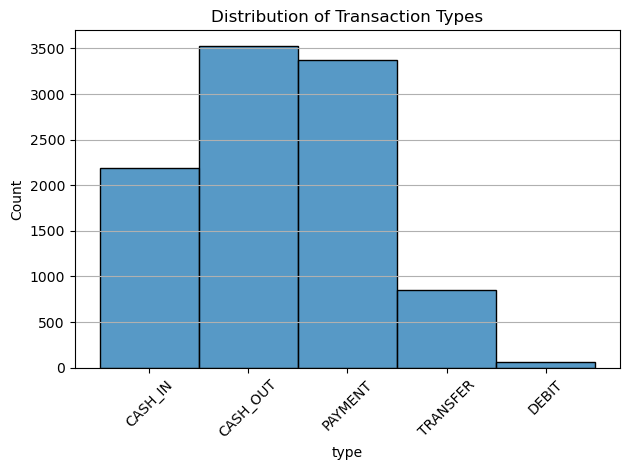

In [ ]:
# Histogram for categorical data
cat_cols = transactions_sampled.select_dtypes(include=['object']).columns
sns.histplot(data=transactions_sampled, x='type')
plt.title('Distribution of Transaction Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

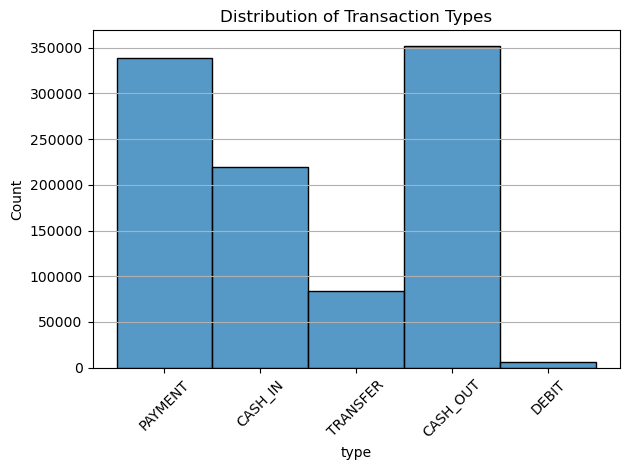

In [17]:
# Histogram for categorical data from the original dataset including DEBIT types
cat_cols = transactions.select_dtypes(include=['object']).columns
sns.histplot(data=transactions, x='type')
plt.title('Distribution of Transaction Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

When comparing the numeric features of the amount and old balance origin (oldbalanceOrg), we can analyze how a person's bank account is affected by transaction amounts and balance distributions in relation to fraudulent activities. 

Our visualization indicates that non-fraudulent transactions are more concentrated in the transfer amounts ranging from 0 to 4. The highest concentration of these transactions occurs when the original balance is zero. In contrast, the orange dots represent a significant number of fraudulent activities that take place with transfer amounts between 0 and 1. There are noticeable clusters where these fraudulent transactions seem to concentrate, particularly when the account balances are between 0.0 and 0.4.

This suggests that fraudulent activity is more likely to occur when smaller amounts of money are being transferred or withdrawn. This finding is further supported by our count of fraud by transaction types. Additionally, our scatterplot reveals one unusually high money transfer, but this does not indicate any fraudulent activity associated with it



- The two numeric features that we compared with for our scatterplot was that of amount(the amount of money transferred) and oldbalanceOrg(the orign accounts balance before transaction). This is show the comparsion between a account holders transfer amounts and the account balence before a transction occurred taking into account any fraudlent acitivities.

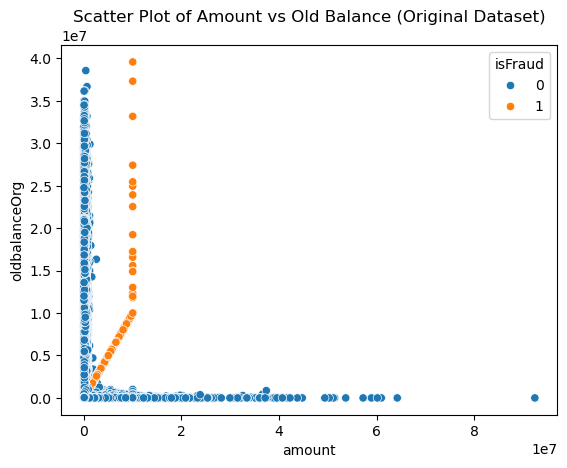

In [18]:
# Scatter plot to comapare the numeric features of amount and oldbalanceOrg
sns.scatterplot(data=transactions, x='amount', y='oldbalanceOrg', hue='isFraud')
plt.title('Scatter Plot of Amount vs Old Balance (Original Dataset)')
plt.show()

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.


Based on our summary statistics on all of the transaction types from both our sampled data and our original dataset, we can make the following observations: 

- The **Transfer** transaction types have the highest average amount when compared to the other transaction types. This is shown in both the sampled transaction dataset and the original dataset. We also that the **Transfer** transactions have the highest mediam amount, with 304512 (sample data) and 487883.710(originial dataset). 

- The second most commmon transaction type for bank transaction based on the average amount from the originial dataset is that of **Cash_in** and **Cash_out** with 168928 and 175584 respectfully. 


- The last two payment transaction types were **Payment** and **Debit**. This shows that the average amount of money transferred by these two transaction types had significantly lower median and average amounts.

In [19]:
# Summary Statistics for all transaction types except for DEBIT
summary_stats = transactions_sampled.groupby('type').agg({
    'amount': ['mean', 'median', 'std', 'min', 'max']})
print("\nSummary statistics for all transaction types:")
print(summary_stats)


Summary statistics for all transaction types:
                amount                                              
                  mean     median           std     min          max
type                                                                
CASH_IN   1.715458e+05  144950.01  1.283078e+05  244.89    768677.64
CASH_OUT  1.712429e+05  146997.55  1.272420e+05   37.73   1160652.82
DEBIT     4.708980e+03    3567.52  5.527931e+03   35.94     37043.98
PAYMENT   1.349512e+04    9838.18  1.321243e+04   16.22    172964.63
TRANSFER  1.016059e+06  508998.78  2.205391e+06   19.03  40686891.57


In [20]:
# Summart Statistics for all transaction types in the original dataset
summary_stats = transactions.groupby('type').agg({
    'amount': ['mean', 'median', 'std', 'min', 'max']})
print("\nSummary statistics for all transaction types:")
print(summary_stats)


Summary statistics for all transaction types:
                 amount                                             
                   mean      median           std   min          max
type                                                                
CASH_IN   168928.914668  142942.990  1.267864e+05  0.43   1609288.13
CASH_OUT  175584.659320  146209.915  1.703743e+05  0.00  10000000.00
DEBIT       5445.890813    3099.530  1.302416e+04  5.24    389762.68
PAYMENT    13055.592085    9481.670  1.256291e+04  0.03    230549.18
TRANSFER  911827.155179  487883.710  1.896175e+06  2.60  92445516.64


### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Based on our originial dataset, we can see that transaction amounts due vary when compared to whether it is a fraudulent and non-fraudulent transaction across the different transaction types. We can that a small amount of fradulent transactions occur in the **Cash_Out** and the **Transfer** transaction types.


It less way less than the count of 5,000 transactions. The data also shows that the **Cash_Out** and **Payment** types are the most common transactions in the bank accounts, with 350000 and 320000 respectfully. The patterns that emerge is that the likeliehood of fraud occurs when an individual is taking cash out or transfering payment to another account. Though there is a small degree of actual fraud occurring with these transactions. 

- We created bar plot to show the distrubtion of fraud transactions by type: 

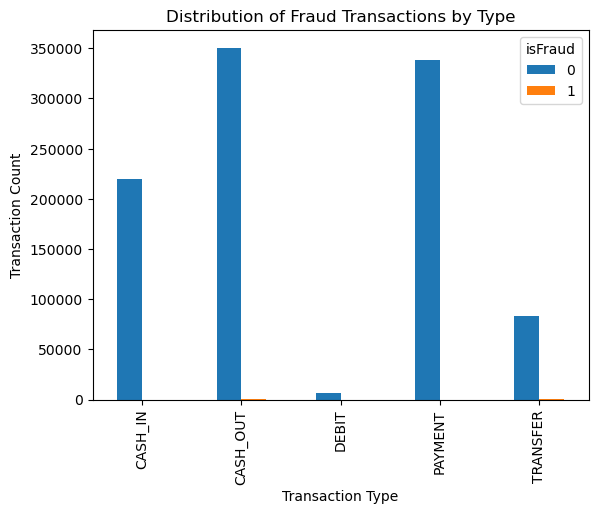

In [21]:
# Distrubtion of fraud transactions by type (ISfraud and type) from the original dataset
transactions.groupby(['type', 'isFraud']).size().unstack().plot(kind='bar') # 1 - is fraud, 0 - not fraud
plt.title('Distribution of Fraud Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.show()

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

We grouped the transaction types by whether it was flagged as fraud and found that the only transaction type that was flagged as fraud based on 83,964 transactions was that of **Transfer**. If we were to compare this data to the actual fraud transactions by type, we can see that there are discrepancies between the built-in fraud flag and where the fraud is occurring. 

For example, we can see that the highest number of fraud is occurring in **Cash_Out** and **Transfer** transaction types. Cash_Out had 657 fraud transactions, and Transfer had 640 fraud transactions. We can see that there is a clear discrepancy between the actual fraud being flagged and what is considered fraudulent activity on the account. 

Visually, we can also see that there is a higher distribution in both flagged fraud and actual fraud, with transactions that occurred not being labeled as fraud. There is a very small number that is being shown in the barplot of fraud for each of the transaction types. 

- First, we will count the value counts of transaction types wtih the flagged fraud transactions from our originial dataset: 

In [23]:
# Show the value counts of actual fraud transactions by type from the original dataset
transactions.groupby('type')['isFlaggedFraud'].value_counts()
Is_Fraud_Flagged = pd.crosstab(index=transactions['type'], columns=transactions['isFlaggedFraud'])
print("Crosstab of Transaction Type and isFlaggedFraud:")
print(Is_Fraud_Flagged)



Crosstab of Transaction Type and isFlaggedFraud:
isFlaggedFraud       0  1
type                     
CASH_IN         219955  0
CASH_OUT        351360  0
DEBIT             6417  0
PAYMENT         338573  0
TRANSFER         83694  1


- Secondly, we will also count the values of transaction types with the actual fraudulent activities from our original dataset:

In [30]:
# shows the values count of grouped transaction types and the amount of fraud transctions from these transction types
transactions.groupby('type')['isFraud'].value_counts()
Is_Fraud = pd.crosstab(index=transactions['type'], columns=transactions['isFraud'])
print("Crosstab of Transaction Type and isFraud:")
print(Is_Fraud)

Crosstab of Transaction Type and isFraud:
isFraud        0    1
type                 
CASH_IN   219955    0
CASH_OUT  350703  657
DEBIT       6417    0
PAYMENT   338573    0
TRANSFER   83055  640


In [ ]:
# Shows the value counts of flagged fraud transactions from original dataset
FlaggedFraud_counts = transactions['isFlaggedFraud'].value_counts()
print("Value Counts of Flagged Fraud Transactions:")
print(FlaggedFraud_counts)

Value Counts of Flagged Fraud Transactions:
isFlaggedFraud
0    999999
1         1
Name: count, dtype: int64


Text(0, 0.5, 'Count of Transactions')

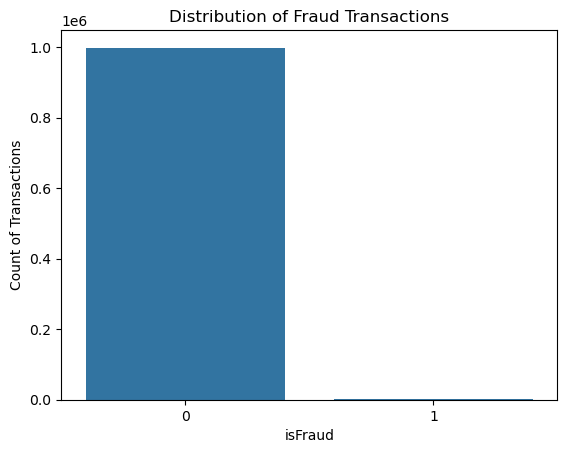

In [27]:
# Bar plot to show the distribution of fraud transactions that are truly fraudulent and not fraudulent from original dataset
transactions.isFraud.value_counts()
sns.barplot(x=transactions.isFraud.value_counts().index, y=transactions.isFraud.value_counts().values)
plt.title('Distribution of Fraud Transactions')
plt.xlabel('isFraud')
plt.ylabel('Count of Transactions')     


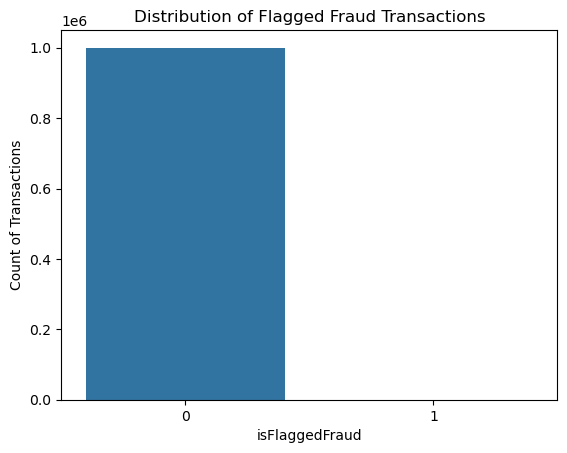

In [ ]:
# Shows the flagged fraud transactions from the original dataset
transactions.isFlaggedFraud.value_counts()
sns.barplot(x=transactions.isFlaggedFraud.value_counts().index, y=transactions.isFlaggedFraud.value_counts().values)
plt.title('Distribution of Flagged Fraud Transactions')
plt.xlabel('isFlaggedFraud')
plt.ylabel('Count of Transactions')
plt.show()